In [13]:
# Consolidate barycenter speed from all the simulations
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import study_pairs_abacus as spa
import generateInfo as gi

In [14]:
main_data_path = '/Users/forero/github/PeculiarMotion/data'

In [48]:
def consolidate(sim_name):
    if sim_name=='abacus':
        n_boxes = 20
        all_data = {}
        for i in range(n_boxes):
            data = spa.load_box(main_data_path, BoxID=i, fixed_cosmo=True)
            ii = (data['vmax_A']<240) & (data['vmax_B']<240) 
            ii &= (data['vel_AB_rad']<0) 
            filename = 'cmspeed_{}_planck_00_box_{:02d}.dat'.format(sim_name, i)
            filename = os.path.join(main_data_path, 'summary', filename)
            np.savetxt(filename, data['vel_CM_mag'][ii].T)
    elif sim_name=='clues':
        sim_id = ["10909", "16953", "2710"]
        vcm = []
        for sim in sim_id:
            FOF_file = os.path.join(main_data_path, sim_name, "IC{}_halos_catalog.dat".format(sim))
            ID_file = os.path.join(main_data_path, sim_name, "index_LG_IC{}".format(sim))
            output_file = "tmp.dat"
            gi.generate_info(FOF_file, ID_file, output_file=output_file, hubble=0.73)
            physical_data = np.loadtxt(output_file)
            vcm.append(physical_data[2])
        vcm = np.array(vcm)
        filename = 'cmspeed_{}.dat'.format(sim_name)
        filename = os.path.join(main_data_path, 'summary', filename)
        np.savetxt(filename, vcm.T)
        print('VCM', vcm)
    elif sim_name=='bolshoi':
        sim_id = ["BDM", "FOF"]
        for sim in sim_id:
            FOF_file = os.path.join(main_data_path, sim_name, "Bolshoi_catalog_{}.dat".format(sim))
            ID_file = os.path.join(main_data_path, sim_name, "IsoPairs_Bolshoi_{}_ID.dat".format(sim))
            output_file = "tmp.dat"
            gi.generate_info(FOF_file, ID_file, output_file=output_file, hubble=0.70)
            physical_data = np.loadtxt(output_file)
            filename = 'cmspeed_{}_{}.dat'.format(sim_name, sim)
            filename = os.path.join(main_data_path, 'summary', filename)
            np.savetxt(filename, physical_data[:,2].T)
    elif sim_name=='elvis':
        vcm = []
        for i in range(12):
            filename = os.path.join(main_data_path, sim_name, 'elvis_{:d}.dat'.format(i))
            data = np.loadtxt(filename, skiprows=2)
            mvir = data[:,9]
            ii = np.argsort(-mvir)
            data = data[ii,:]
            mass = data[:2,9]
            vels = data[:2,4:7]
    
            #print(mass, np.linalg.norm(vels[0,:]))
            m_tot = np.sum(mass)
            vel_x = (mass[1]*vels[1,0] + mass[0]*vels[0,0])/m_tot
            vel_y = (mass[1]*vels[1,1] + mass[0]*vels[0,1])/m_tot
            vel_z = (mass[1]*vels[1,2] + mass[0]*vels[0,2])/m_tot
    
            vcm.append(np.sqrt(vel_x**2 + vel_y**2 + vel_z**2))
        vcm = np.array(vcm)
        filename = 'cmspeed_{}.dat'.format(sim_name)
        filename = os.path.join(main_data_path, 'summary', filename)
        np.savetxt(filename, vcm.T)
        print('VCM', vcm)              

In [61]:
consolidate('elvis')
consolidate('clues')
consolidate('bolshoi')
consolidate('abacus')

VCM [ 37.66496068 339.13703708 189.65294593 210.9266964  149.26107408
 147.68676678 122.23960773  82.50931349 220.67811099 366.35714396
 188.90703114 203.61413873]
1
894 674
selected in total 1
1
1106 888
selected in total 1
1
830 642
selected in total 1
VCM [357.821    448.458949 356.634919]
1924
69681 9802
56648 9806
90899 9847
15251 9862
13883 9875
11347 9877
61596 9882
51660 9889
61234 9892
46192 9919
15597 9937
81302 9956
58998 9958
13606 10007
79652 10011
69115 10019
19010 10022
80306 10034
56153 10036
89669 10039
27986 10042
41870 10059
72671 10078
68021 10106
40247 10139
19456 10166
92768 10226
32523 10236
84758 10244
30433 10249
26880 10251
27527 10262
54871 10271
23437 10274
90808 10299
34851 10302
27850 10304
47602 10338
80303 10350
37058 10358
46912 10395
50809 10417
85084 10418
47093 10431
20232 10436
18013 10444
14945 10445
41547 10456
74599 10464
26157 10488
29788 10495
61620 10511
46978 10559
71720 10569
64118 10576
53142 10578
28818 10583
66358 10598
30282 10602
42665 

50749 30904
81503 30907
52214 30938
57695 30982
72387 30985
34185 31011
53654 31056
49370 31112
91812 31150
49839 31185
71566 31190
63006 31217
37539 31232
78679 31241
45288 31246
52041 31319
38286 31325
58102 31357
78691 31461
84332 31500
75055 31508
38773 31575
85185 31595
85640 31619
37952 31625
62301 31666
81760 31703
89309 31728
82205 31752
33272 31765
68883 31794
48737 31805
58038 31894
56221 31941
53731 31986
77257 32055
39812 32073
38182 32137
79225 32169
83848 32185
72003 32220
87009 32265
39409 32285
87303 32286
33594 32305
64917 32345
80029 32382
87931 32395
79752 32401
56310 32445
43139 32554
51497 32588
44820 32625
70440 32641
38583 32656
77943 32671
88261 32677
74500 32702
83166 32709
49275 32733
67725 32740
68120 32741
80484 32791
86933 32803
47478 32834
56945 32845
35285 32874
57596 32901
41497 32916
40308 32942
87299 32956
33470 32964
56421 32969
81354 33007
77774 33043
66545 33117
49692 33189
76299 33240
49675 33296
88999 33297
80023 33304
77847 33338
75449 33360
3957

1256
93452 11347
74692 11386
63945 11389
68719 11416
42769 11457
35936 11555
95144 11558
68378 11612
49794 11617
36527 11650
63285 11674
68430 11697
85943 11738
65425 11747
92179 11759
33824 11773
57628 11782
82128 11909
60192 12022
59928 12026
26265 12027
43002 12034
67435 12187
88294 12217
32454 12276
45752 12279
82762 12304
85972 12380
97279 12386
22272 12402
62731 12444
93730 12483
27453 12516
82935 12538
29917 12580
77695 12603
15432 12614
53696 12657
43980 12746
95319 12802
15038 12824
26482 12829
95506 12840
36888 12842
68481 12872
47876 12899
15180 12907
93695 12952
33277 13048
43217 13138
34070 13143
56744 13159
75763 13230
98444 13312
96836 13329
95827 13344
26061 13388
82303 13402
52464 13433
75843 13435
15595 13452
28897 13470
53031 13480
53997 13538
98649 13580
30195 13658
77950 13712
63953 13716
96412 13822
53785 13831
42111 13848
64168 13886
67561 13939
66877 14039
56515 14050
77021 14134
71043 14181
89081 14209
44659 14233
37354 14258
91265 14286
49655 14318
73555 14338

92569 76920
85824 77018
82481 77162
81820 77423
83999 77540
96918 77711
80795 78027
80113 78275
92769 78285
88420 78488
84517 79238
86307 79455
84275 79478
97791 79611
85830 80553
98383 80609
91061 80673
99282 80947
85606 81095
82755 81117
88466 81883
98260 82200
82741 82215
83623 82311
93863 82579
96992 83203
96529 83825
86036 84086
94183 84456
94328 84950
95944 85154
98868 85357
93952 85387
92096 85902
96246 86365
94129 86695
89991 86989
89696 87813
96667 87910
94221 88212
91673 89233
91581 89444
92465 89578
99225 89841
90487 89847
93610 89864
97205 90325
95353 91155
95252 91179
96034 92258
92885 92284
95565 92476
96306 92514
98854 92587
93971 92640
95943 95530
selected in total 1255
Finished reading /Users/forero/github/PeculiarMotion/data/abacus/pairs_planck_00_box_00.hdf5
Finished reading /Users/forero/github/PeculiarMotion/data/abacus/pairs_planck_00_box_01.hdf5
Finished reading /Users/forero/github/PeculiarMotion/data/abacus/pairs_planck_00_box_02.hdf5
Finished reading /Users/fo

In [66]:
datac = np.loadtxt('/Users/forero/github/PeculiarMotion/data/summary/cmspeed_clues.dat')
data = np.loadtxt('/Users/forero/github/PeculiarMotion/data/summary/cmspeed_bolshoi_BDM.dat')
data2 = np.loadtxt('/Users/forero/github/PeculiarMotion/data/summary/cmspeed_bolshoi_FOF.dat')
data0 = np.loadtxt('/Users/forero/github/PeculiarMotion/data/summary/cmspeed_abacus_planck_00_box_00.dat')
data1 = np.loadtxt('/Users/forero/github/PeculiarMotion/data/summary/cmspeed_abacus_planck_00_box_01.dat')

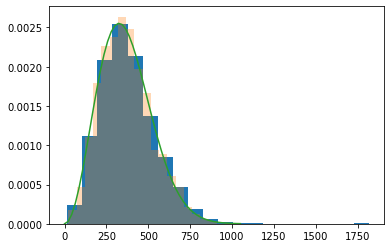

In [63]:
def d(x, a=200):
    y = np.sqrt(2.0/np.pi) * x**2 * np.exp(-0.5*(x/a)**2)/a**3
    return y
    
plt.hist(data, bins=20, density=True)
plt.hist(data2, bins=20, density=True, alpha=0.3)
x = np.linspace(0,1050)
y = d(x,a=230)
plt.plot(x,y)

In [64]:
datae= np.loadtxt('/Users/forero/github/PeculiarMotion/data/summary/cmspeed_elvis.dat')

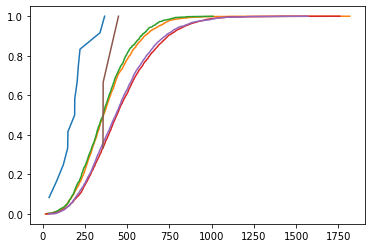

In [67]:
plt.plot(np.sort(datae), np.linspace(1/len(datae),1, len(datae)))
plt.plot(np.sort(data), np.linspace(1/len(data),1, len(data)))
plt.plot(np.sort(data2), np.linspace(1/len(data2),1, len(data2)))
plt.plot(np.sort(data0), np.linspace(1/len(data0),1, len(data0)))
plt.plot(np.sort(data1), np.linspace(1/len(data1),1, len(data1)))
plt.plot(np.sort(datac), np.linspace(1/len(datac),1, len(datac)))